In [1]:
# This adds the path to import the development version (git repo) of NDI Python
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Import numpy
import numpy as np
# Bring in the parts of NDI we need
from ndi import experiment
from ndi.daqsystem.mfdaq import DaqSystemMultiFunction
from ndi.schema.ChannelType import ChannelType
# UUID to mock an experiment reference
from uuid import uuid4
# matplotlib for graphing later
import matplotlib.pyplot

In [3]:
# Setup the experiment object
my_experiment = experiment.Experiment(name='demo', path='demo', unique_reference=uuid4())

In [4]:
# Add the DaqSystem we're using
from ndi.daqsystem.daqreaders.spikegadgets.mfdaq_sg import DaqReaderMultiFunctionSg
rec_file_path = '../tests/data/daqreaders/spikegadgets/CS31_20170201_OdorPlace1short.rec'
daq_system = DaqSystemMultiFunction(name='spikegadget_demo', daq_reader=DaqReaderMultiFunctionSg(path=rec_file_path))
my_experiment.daq_system_add(daq_system)

In [5]:
# Load an app for spike extraction
from ndi.app.spikeextract import AppSpikeExtract
spike_extractor = AppSpikeExtract()

In [6]:
# Select a probe
probe = my_experiment.get_probes(name='Tetrode7', type=ChannelType.analog_in, reference=1).pop() # Pop first result

In [7]:
# Read in associated data
timestamps, probe_data = daq_system.read_channels(ChannelType.analog_in, [probe])

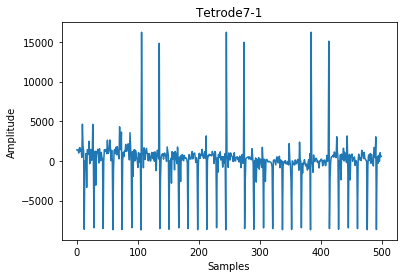

In [8]:
# Show raw probe data
matplotlib.pyplot.plot(probe_data[500:1000])
matplotlib.pyplot.title('Tetrode7-1')
matplotlib.pyplot.xlabel('Samples')
matplotlib.pyplot.ylabel('Amplitude')
matplotlib.pyplot.show()

In [9]:
# Run the spike extractor inline
extracted_spikes = spike_extractor.run(probe_data)

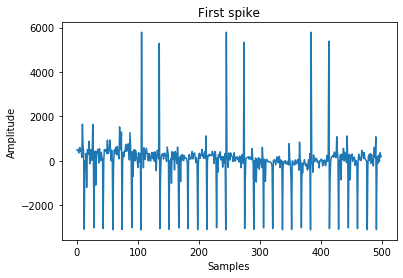

In [14]:
# Graph our results
matplotlib.pyplot.plot(extracted_spikes[500:1000])
matplotlib.pyplot.title('First spike')
matplotlib.pyplot.xlabel('Samples')
matplotlib.pyplot.ylabel('Amplitude')
matplotlib.pyplot.show()